In [1]:
from scipy.io import FortranFile as ff
import numpy as np
#np.set_printoptions(threshold=50)
import math
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm

In [2]:
#Read the initial rays, to get the weights (computed based on the luminosity of the stars)
IC_file = '/cral/mauerhofer/RascasFiles/................'
f = ff(IC_file,'r')
nrays = f.read_ints()[0]
f.read_reals()
weights = f.read_reals()
f.close()

In [3]:
print(nrays)
print(weights)

1510021
[5.89591354e+45 5.65252523e+45 2.36823761e+45 ... 1.39650300e+46
 4.74858049e+45 4.63669529e+45]


In [4]:
#Read the output
output_CD_file = '/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/Halo1/OI_SiII/CD/output_CD'
f = ff(output_CD_file,'r')
nrays = f.read_ints()[0]
ndirections = f.read_ints()[0]
nGas = f.read_ints()[0]
vmin, vmax = f.read_reals()
nBins = f.read_ints()[0]
dv = (vmax-vmin)/nBins
v = np.linspace(vmin - dv/2, vmax + dv/2, nBins+2)

In [23]:
f.close()

In [5]:
print(ndirections, nGas, vmin, vmax, nBins)

6 3 -500.0 500.0 1


In [6]:
#Define the directions 
import healpy as hp
nside = 3  #nDirections = 12 * nside^2
nvec = hp.nside2npix(nside)
directions = np.zeros((nvec,3))
for i in range (0,nvec) :
    directions[i,:] = hp.pix2vec(nside,i)

In [8]:
#plt.style.use('seaborn')

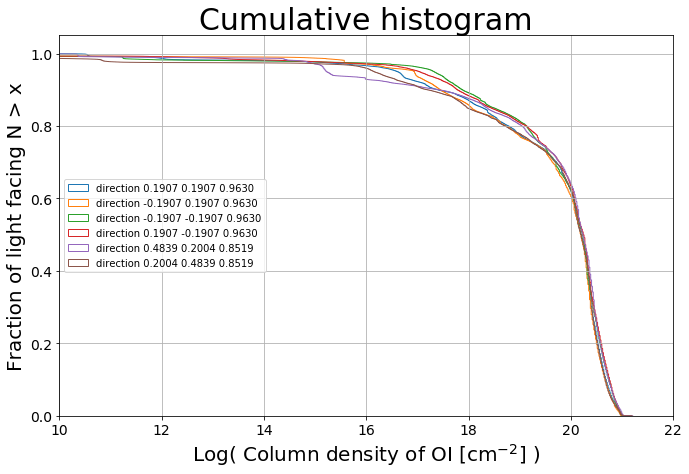

In [7]:
#OI column density :
fig2, ax2 = plt.subplots(figsize=(11, 7))
n_bins=1000
for k in range(ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights, density=True, histtype='step', cumulative=-1, label='direction %05.4f %05.4f %05.4f'%(directions[k,0],directions[k,1],directions[k,2]))
    #To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
ax2.legend(loc='center left')#,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlim(10,22)
ax2.set_title('Cumulative histogram', fontsize=30)
ax2.set_xlabel(r'Log( Column density of OI $[\mathrm{cm}^{-2}]$ )', fontsize=20)
ax2.set_ylabel('Fraction of light facing N > x', fontsize=20)
#plt.savefig('/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/OI_SiII/CD/Halo1/histo_cumul_O_%i.png'%k)
plt.show()
plt.close()


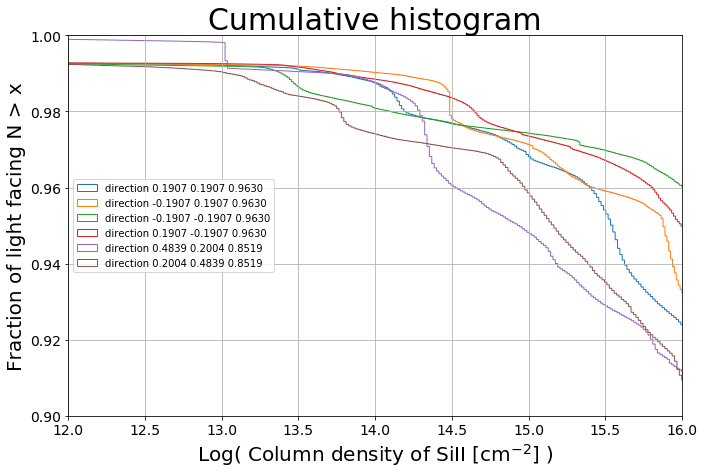

In [8]:
#SiII column density :
fig2, ax2 = plt.subplots(figsize=(11, 7))
n_bins=1000
for k in range(ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights, density=True, histtype='step', cumulative=-1, label='direction %05.4f %05.4f %05.4f'%(directions[k,0],directions[k,1],directions[k,2]))
    
#To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
ax2.legend(loc='center left')#,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax2.set_xlim(12,16)
#ax2.set_ylim(0.9,1.0)
ax2.set_title('Cumulative histogram', fontsize=30)
ax2.set_xlabel(r'Log( Column density of SiII $[\mathrm{cm}^{-2}]$ )', fontsize=20)
ax2.set_ylabel('Fraction of light facing N > x', fontsize=20)
#plt.savefig('/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/OI_SiII/CD/Halo1/histo_cumul_Si_%i.png'%k)
plt.show()
plt.close()

In [9]:
print(CD_tot_per_part.shape)
CD_dust = np.zeros((ndirections,nrays))
print(CD_dust.shape)

(1510021,)
(6, 1510021)


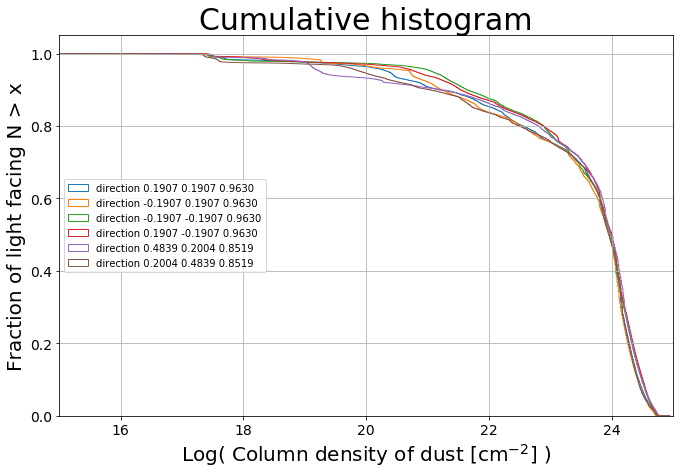

In [10]:
#dust column density :
fig2, ax2 = plt.subplots(figsize=(11, 7))
n_bins=1000
for k in range(ndirections):

    CD = f.read_reals()
    #CD begins with npart CD for the first bin of velocity,  then npart CD for the second bin,  etc
    
    CD2 = CD.reshape((nBins+2,nrays))

    #To do the cumulative plot
    CD_tot_per_part = np.sum(CD2,axis=0)
    CD_dust[k,:] = CD_tot_per_part
    
    n, bins, patches = ax2.hist(np.log10(CD_tot_per_part), bins=n_bins, weights=weights, density=True, histtype='step', cumulative=-1, label='direction %05.4f %05.4f %05.4f'%(directions[k,0],directions[k,1],directions[k,2]))
    
#To do the cumulative plot
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.5)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(minor_ticks_y, minor=True)
ax2.legend(loc='center left')#,fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlim(15,25)
#ax2.set_ylim(0.9,1.0)
ax2.set_title('Cumulative histogram', fontsize=30)
ax2.set_xlabel(r'Log( Column density of dust $[\mathrm{cm}^{-2}]$ )', fontsize=20)
ax2.set_ylabel('Fraction of light facing N > x', fontsize=20)
#plt.savefig('/cral/mauerhofer/RascasFiles/sphinx/05_F1000/02_IC20_BP/00183/OI_SiII/CD/Halo1/histo_cumul_Si_%i.png'%k)
plt.show()
plt.close()
f.close()

In [15]:
tau_dust = 6.14e-23*CD_dust
weight = np.exp(-tau_dust)

In [33]:
print(weight.shape)
print(weight[1,100000:100010])
small = np.where(weight[0,:]<0.000001)[0]
print(small.shape)

(6, 1510021)
[0.98747067 0.97206491 0.97224225 0.9987699  0.90879308 0.91631688
 0.99918209 0.99944228 0.99595846 0.95409468]
(975087,)


In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']
